In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# importing plotly and chart_studio for plots
# importing wordcloud for creating wordcloud

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from plotly import __version__
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import chart_studio.plotly as py
import cufflinks as cf

init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

In [3]:
books = pd.read_csv('good_reads_cleaned.csv', index_col=0)

In [4]:
books.head()

,titles,series,author,avg_rating,no_of_ratings,no_of_reviews,score,no_of_votes,no_of_awards,pages,genre,language,description,urls
0,The Fault in Our Stars,NaN,John Green,4.21,3440830,154119,200915,2036,30,313.0,Young Adult,English,Despite the tumor-shrinking medical miracle th...,https://www.goodreads.com/book/show/11870085-t...
1,Divergent,"Divergent, #1",Veronica Roth,4.20,2827788,107483,146943,1502,22,487.0,Young Adult,English,"In Beatrice Prior's dystopian Chicago world, s...",https://www.goodreads.com/book/show/13335037-d...
2,Mockingjay,"The Hunger Games, #3",Suzanne Collins,4.04,2280856,102828,141681,1452,5,390.0,Young Adult,English,The final book in the ground-breaking HUNGER G...,https://www.goodreads.com/book/show/7260188-mo...
3,Gone Girl,NaN,Gillian Flynn,4.07,2263105,131765,124840,1273,11,415.0,Fiction,English,Marriage can be a real killer.On a warm summer...,https://www.goodreads.com/book/show/19288043-g...
4,The Martian,NaN,Andy Weir,4.40,789350,72023,120718,1230,12,369.0,Science Fiction,English,"Six days ago, astronaut Mark Watney became one...",https://www.goodreads.com/book/show/18007564-t...


In [5]:
books.shape

(1000, 14)

In [6]:
books.describe()

,avg_rating,no_of_ratings,no_of_reviews,score,no_of_votes,no_of_awards,pages
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,997.000000
mean,4.041600,1.280885e+05,10539.596000,5005.211000,54.039000,3.196000,390.299900
std,0.287592,2.437523e+05,14897.531695,15375.143554,158.417763,4.053642,161.545999
min,2.790000,2.000000e+00,0.000000,271.000000,2.000000,0.000000,1.000000
25%,3.860000,2.236350e+04,2383.750000,400.000000,5.000000,1.000000,307.000000
50%,4.050000,5.867400e+04,5439.500000,710.500000,9.000000,2.000000,367.000000
75%,4.240000,1.391352e+05,12656.000000,2166.000000,27.000000,4.000000,452.000000
max,5.000000,3.440830e+06,154119.000000,200915.000000,2036.000000,30.000000,1859.000000


In [7]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   titles         1000 non-null   object 
 1   series         472 non-null    object 
 2   author         1000 non-null   object 
 3   avg_rating     1000 non-null   float64
 4   no_of_ratings  1000 non-null   int64  
 5   no_of_reviews  1000 non-null   int64  
 6   score          1000 non-null   int64  
 7   no_of_votes    1000 non-null   int64  
 8   no_of_awards   1000 non-null   int64  
 9   pages          997 non-null    float64
 10  genre          992 non-null    object 
 11  language       993 non-null    object 
 12  description    998 non-null    object 
 13  urls           1000 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 117.2+ KB


Here we can see that there are 472 books that are part of a series.

We can also see that 3 books don't have number of pages , 8 books don't have a genre listed, 7 books don't have a language specified and 2 books don't have a description.

We can replace missing number of pages by the mean value of the number of pages and we can replace missing genre and language by their respective mode values.

In [8]:
books['pages'].fillna(books['pages'].mean(), inplace=True)

In [9]:
books['genre'].fillna(books['genre'].mode()[0], inplace=True)

In [10]:
books['language'].fillna(books['language'].mode()[0], inplace=True)

In [11]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   titles         1000 non-null   object 
 1   series         472 non-null    object 
 2   author         1000 non-null   object 
 3   avg_rating     1000 non-null   float64
 4   no_of_ratings  1000 non-null   int64  
 5   no_of_reviews  1000 non-null   int64  
 6   score          1000 non-null   int64  
 7   no_of_votes    1000 non-null   int64  
 8   no_of_awards   1000 non-null   int64  
 9   pages          1000 non-null   float64
 10  genre          1000 non-null   object 
 11  language       1000 non-null   object 
 12  description    998 non-null    object 
 13  urls           1000 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 157.2+ KB


Now we will plot histograms to check out the distribution of different values.

In [12]:
# histogram for average rating

fig = px.histogram(books, x="avg_rating",opacity=0.8, color_discrete_sequence=['#6060f7'])
fig.update_layout(xaxis_title_text='Average Ratings',
                  yaxis_title_text='Count')
fig.update_xaxes(nticks=14)
fig.show()

We can see that the majority of the books have received a rating between 4.03 and 4.07. We can see that the average ratings follow a normal distribution. 

In [13]:
# histogram for number of pages

fig = px.histogram(books, x="pages",opacity=0.8, color_discrete_sequence=['#6060f7'])
fig.update_layout(xaxis_title_text='Number of Pages',
                  yaxis_title_text='Count')
fig.update_xaxes(nticks=15)
fig.show()

We can see that more than 1/5 th of the books have between 300 - 350 pages. The biggest book contains more than 1800 pages.

In [14]:
# histogram for number of ratings
 
fig = px.histogram(books, x="no_of_ratings",opacity=0.8, color_discrete_sequence=['#6060f7'])
fig.update_layout(xaxis_title_text='Number of Ratings',
                  yaxis_title_text='Count')
fig.update_xaxes(nticks=15)
fig.show()

The above graph is difficult to read as majority of the books have a low number of ratings. It is better to use a log scale for the Y axis.

In [15]:
# histogram for number of ratings (log)
 
fig = px.histogram(books, x="no_of_ratings",opacity=0.8, color_discrete_sequence=['#6060f7'], log_y=True)
fig.update_layout(xaxis_title_text='Number of Ratings',
                  yaxis_title_text='Count')
fig.update_xaxes(nticks=15)
fig.show()

This graph is easier to read and we can see that 84.2% of the books have fewer than 200k ratings.

In [16]:
# histogram for number of reviews (log)
 
fig = px.histogram(books, x="no_of_reviews",opacity=0.8, color_discrete_sequence=['#6060f7'], log_y=True)
fig.update_layout(xaxis_title_text='Number of Reviews',
                  yaxis_title_text='Count')
fig.update_xaxes(nticks=15)
fig.show()

We can see that 67.6% of the books have fewer than 10K reviews, while the highest rated book has more than 150K reviews.

Above histograms give us a good indication of the distribution of the data but they don't give us much information about the outliers. We can use Boxplots to examine the outliers.

In [17]:
# boxplot for average rating

fig = px.box(books, x='avg_rating', hover_name=books['titles'],width=800, height=400, color_discrete_sequence=['#6060f7'])
fig.update_layout(xaxis_title_text='Average Ratings')
fig.show()

From the above boxplot we can infer that :

Median Average Rating = 4.05 and IQR (Middle 50 percent) = 0.38

Two highest rated books:

White boy in Watts - 5.0

Shadow Team GB - 4.85

Two lowest rated books:

The Finkler Question - 2.79

The Secret Lives of People - 3.08

In [18]:
# boxplot for number of pages

fig = px.box(books, x='pages', hover_name=books['titles'],width=800, height=400, color_discrete_sequence=['#6060f7'])
fig.update_layout(xaxis_title_text='Number of Pages')
fig.show()

From the above boxplot we can infer that :

Median Number of Pages = 368 and IQR (Middle 50 percent) = 145

Two books with most pages:

Fifty Shades Trilogy - 1859

Fableheaven - 1500

Two books with least pages:

The Collectors - 1

The Last Boyfriend - 11

In [20]:
# boxplot for number of ratings

fig = px.box(books, x='no_of_ratings', hover_name=books['titles'],width=800, height=400, color_discrete_sequence=['#6060f7'], log_x=True)
fig.update_layout(xaxis_title_text='Number of Ratings')
fig.show()

From the above boxplot we can infer that :

Median Number of Ratings = 58.67K and IQR (Middle 50 percent) = 116.8K

Two books with most number of ratings:

The Fault in Our Stars - 3.44M

Divergent - 2.82M


In [21]:
# boxplot for number of reviews

fig = px.box(books, x='no_of_reviews', hover_name=books['titles'],width=800, height=400, color_discrete_sequence=['#6060f7'], log_x=True)
fig.update_layout(xaxis_title_text='Number of Reviews')
fig.show()

From the above boxplot we can infer that :

Median Number of Reviews = 5440 and IQR (Middle 50 percent) = 10.27K

Two books with most number of reviews:

The Fault in Our Stars - 154.12K

Gone Girl - 131.77K

We will now examine the distribution of books among various genre.

In [22]:
fig = px.histogram(books, x="genre",opacity=0.8, histnorm='percent', width=1000, height=500)
fig.update_layout(xaxis_title_text='Primary Genre',
                  yaxis_title_text='Percent')
fig.show()

From the above histogram we can infer that the most popular genres are :

Fantasy - 23.5%, Fiction - 22.1%, Young Adult - 13.8%

These 3 genres contain almost 60% of total books.

In [23]:
# boxplot for average ratings by genre.

fig = px.box(books, x='genre', y='avg_rating', width=1200, height=600,labels={'genre':'Primary Genre','avg_rating':'Average Ratings'})
fig.show()

We will now plot Wordclouds for Title, Author name and Description.

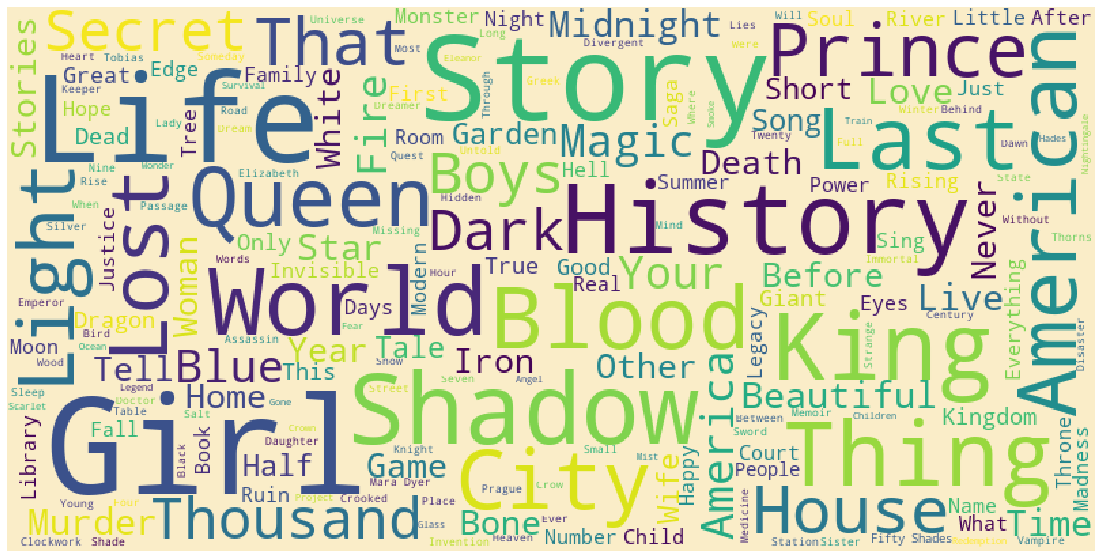

In [28]:
# wordcloud for book titles. setting min_word_length = 4 to discard words such as 'the, is, it, an, etc'

text = " ".join(title for title in books['titles'])

plt.subplots(figsize = (20,10))
wordcloud = WordCloud(width=800, height=400, min_word_length=4, background_color='#faedc8',max_font_size=100).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("wordcloud/title.png", format="png")
plt.show()

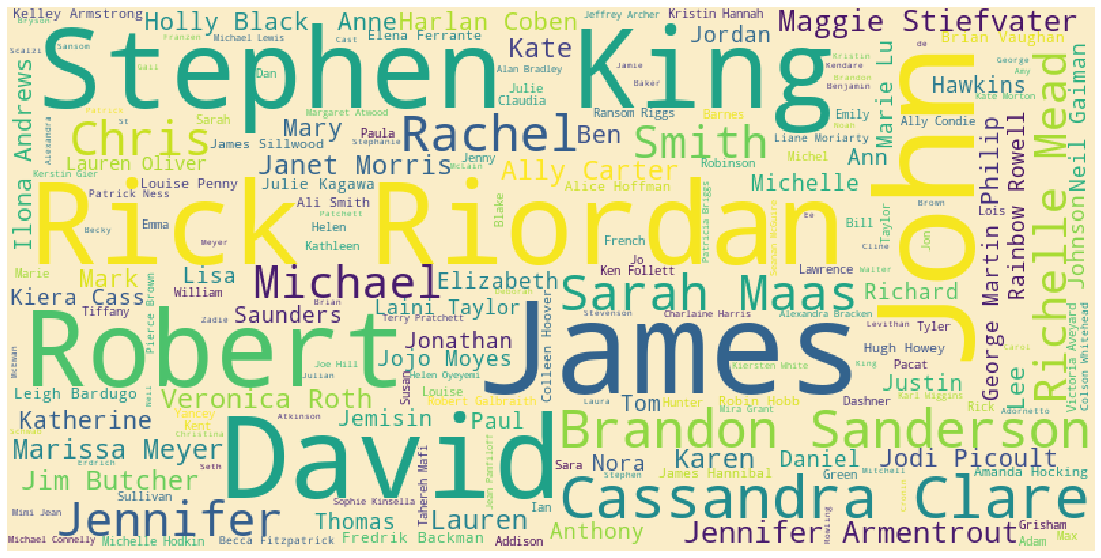

In [29]:
# wordcloud for author names.

text = " ".join(str(desc) for desc in books['author'])

plt.subplots(figsize = (20,10))
wordcloud = WordCloud(width=800, height=400, background_color='#faedc8',max_font_size=100).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("wordcloud/author.png", format="png")
plt.show()

The abover wordcloud contains names of some legendary authors such as : Stephen King and Rick Riordan

And certain generic names such as John, David, Robert and James.

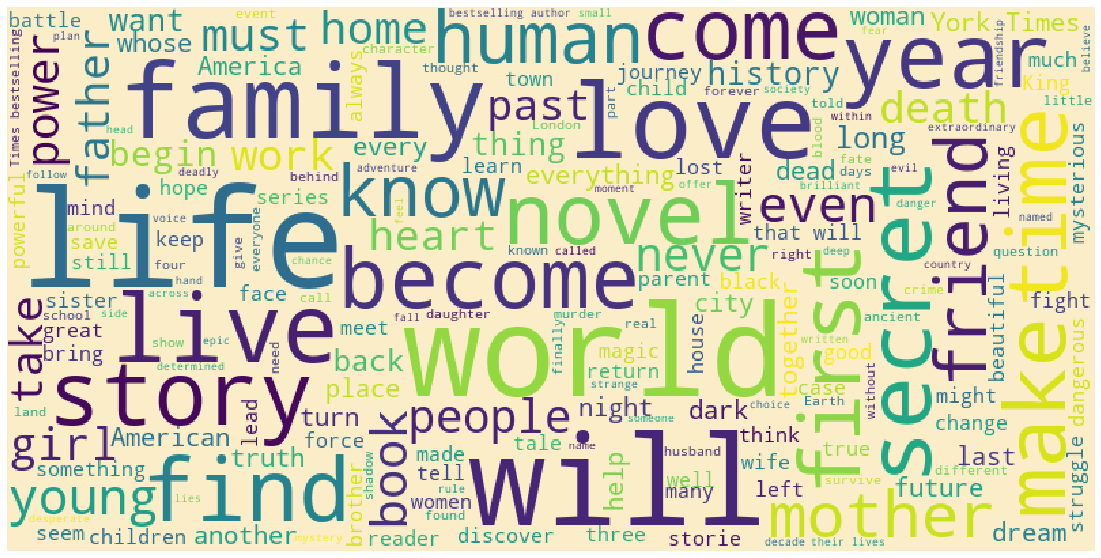

In [30]:
# wordcloud for book description. setting min_word_length = 4 to discard words such as 'the, is, it, an, etc'

text = " ".join(str(desc) for desc in books['description'])

plt.subplots(figsize = (20,10))
wordcloud = WordCloud(width=800, height=400, min_word_length=4, background_color='#faedc8',max_font_size=100).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("wordcloud/description.png", format="png")
plt.show()

Now we will group the books by genre and perform analysis.

In [31]:
books_by_genre = books.groupby('genre')

In [32]:
books_by_genre_med = books_by_genre.median()
books_by_genre_med.head()

,avg_rating,no_of_ratings,no_of_reviews,score,no_of_votes,no_of_awards,pages
genre,,,,,,,
Adventure,4.20,20.0,7.0,386.0,4.0,0.0,390.2999
Autobiography,3.99,1526.0,210.0,700.0,7.0,0.0,321.0000
Biography,4.12,37933.5,1709.5,498.0,6.0,1.5,687.5000
Business,4.57,100.0,71.0,400.0,4.0,0.0,224.0000
Childrens,4.25,28168.0,5619.0,784.0,9.0,8.0,208.0000


Genres that have the longest books (most number of pages) :

In [33]:
books_by_genre_med.sort_values('pages', ascending=False)['pages'].head()

genre
Biography       687.5
World War II    513.0
Science         493.0
Economics       485.5
Horror          482.5
Name: pages, dtype: float64

Genres that have the shortest books (least number of pages) :

In [34]:
books_by_genre_med.sort_values('pages', ascending=True)['pages'].head()

genre
Poetry            111.0
Sequential Art    176.0
Psychology        201.0
Childrens         208.0
Business          224.0
Name: pages, dtype: float64

Genres with highest number of awards :

In [35]:
books_by_genre_med.sort_values('no_of_awards', ascending=False)['no_of_awards'].head()

genre
Childrens         8.0
Economics         5.0
Sequential Art    4.0
Medical           3.0
Fiction           3.0
Name: no_of_awards, dtype: float64

Genres with the highest rated books :

In [36]:
books_by_genre_med.sort_values('avg_rating', ascending=False)['avg_rating'].head()

genre
Business        4.57
Psychology      4.44
Spirituality    4.42
Childrens       4.25
Dark            4.21
Name: avg_rating, dtype: float64

Genres with the most rated books (highest number of ratings) :

In [37]:
books_by_genre_med.sort_values('no_of_ratings', ascending=False)['no_of_ratings'].head()

genre
Womens Fiction    190144.0
Young Adult       116943.5
Romance           113438.0
Humor              83813.0
Sequential Art     75304.0
Name: no_of_ratings, dtype: float64

Genres with the most reviewed books (highest number of reviews) :

In [38]:
books_by_genre_med.sort_values('no_of_reviews', ascending=False)['no_of_reviews'].head()

genre
Romance           10053.0
Young Adult        8342.0
Womens Fiction     7823.0
Horror             6847.5
Historical         6461.0
Name: no_of_reviews, dtype: float64

Finally we perform some analysis on books that are a part of some series and those that aren't.

In [39]:
books['part_of_series'] = books['series'].notnull()

In [40]:
books_by_series = books.groupby('part_of_series')

In [41]:
books_by_series_med = books_by_series.median()
books_by_series_med

,avg_rating,no_of_ratings,no_of_reviews,score,no_of_votes,no_of_awards,pages
part_of_series,,,,,,,
False,3.98,48442.5,5225.5,662.0,8.0,2.0,339.50000
True,4.12,70005.5,5555.0,797.0,10.0,1.0,390.64995


From the above dataframe it can be inferred that books that are part of series have higher average rating (0.14), higher number of ratings (21563), higher score on the list (135) and higher number of pages (51).